In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
from scipy.interpolate import CubicSpline


# Bonds Selected
            CAN 2.25 Mar 24\\
            CAN 1.50 Sep 24\\
            CAN 1.25 Mar 25\\
            CAN 3.00 Oct 25\\
            CAN 3.00 Apr 26\\
            CAN 1.00 Sep 26\\
            CAN 1.25 Mar 27\\
            CAN 2.75 Sep 27\\
            CAN 3.50 Mar 28\\
            CAN 3.25 Sep 28\\ 

In [3]:
# Bond prices, terms, coupons, and days provided
bond_prices = np.array([
    [99.63, 99.64, 99.65, 99.66, 99.67, 99.69, 99.68, 99.68, 99.71, 99.72, 99.72],
    [97.96, 97.98, 97.99, 97.98, 98.02, 98.05, 97.97, 97.98, 98, 98.01, 98.03],
    [96.46, 96.48, 96.55, 96.58, 96.66, 96.72, 96.54, 96.45, 96.5, 96.46, 96.46],
    [98.19, 98.20, 98.26, 98.25, 98.31, 98.31, 98.21, 98.02, 97.98, 97.97, 97.9],
    [98.27, 98.28, 98.37, 98.35, 98.43, 98.44, 98.3, 98.05, 98, 97.99, 97.93],
    [93.46, 93.44, 93.55, 93.53, 93.6, 93.57, 93.4, 93.12, 93.08, 93.07, 93],
    [93.28, 93.30, 93.25, 93.19, 93.47, 93.49, 93.14, 92.86, 92.75, 92.76, 92.83],
    [97.58, 97.59, 97.6, 97.52, 97.74, 97.77, 97.44, 97.09, 96.96, 96.95, 96.94],
    [100.5, 100.48, 100.44, 100.33, 100.64, 100.67, 100.22, 99.83, 99.66, 99.62, 99.67],
    [99.74, 99.72, 99.72, 99.55, 99.88, 99.91, 99.44, 98.99, 98.81, 98.77, 98.83]
]).transpose()
terms = np.array([1/6 + i*0.5 for i in range(10)])  # Terms in years
coupons = np.array([0.0225, 0.015, 0.0125, 0.03, 0.03, 0.01, 0.0125, 0.0275, 0.0350, 0.0325]) * 100  # Coupons in currency units
days = ["Jan 8", "Jan 9", "Jan 10", "Jan 11", "Jan 12", "Jan 15", "Jan 16", "Jan 17", "Jan 18", "Jan 19", "Jan 22"]


# 5-Year Yield Curve (YTM)
(a) (10 points) First, calculate each of your 10 selected bonds’ yield (ytm). Then provide a welllabeled plot with a 5-year yield curve (ytm curve) corresponding to each day of data superimposed on-top of each other. You may use any interpolation technique you deem appropriate
provided you include a reasonable explanation for the technique used.

(b) (15 points) Write a pseudo-code (explanation of an algorithm) for how you would derive the
spot curve with terms ranging from 1-5 years from your chosen bonds in part 2. (Please recall
the day convention simplifications provided in part 2 as well.) Then provide a well-labeled plot
with a 5-year spot curve corresponding to each day of data superimposed on-top of each other.

(c) (15 points) Write a pseudo-code for how you would derive the 1-year forward curve with terms
ranging from 2-5 years from your chosen bonds in part 2 (I.e., a curve with the first point being
the 1yr-1yr forward rate and the last point being the 1yr-4yr rate). Then provide a well-labeled
plot with a forward curve corresponding to each day of data superimposed on-top of each other

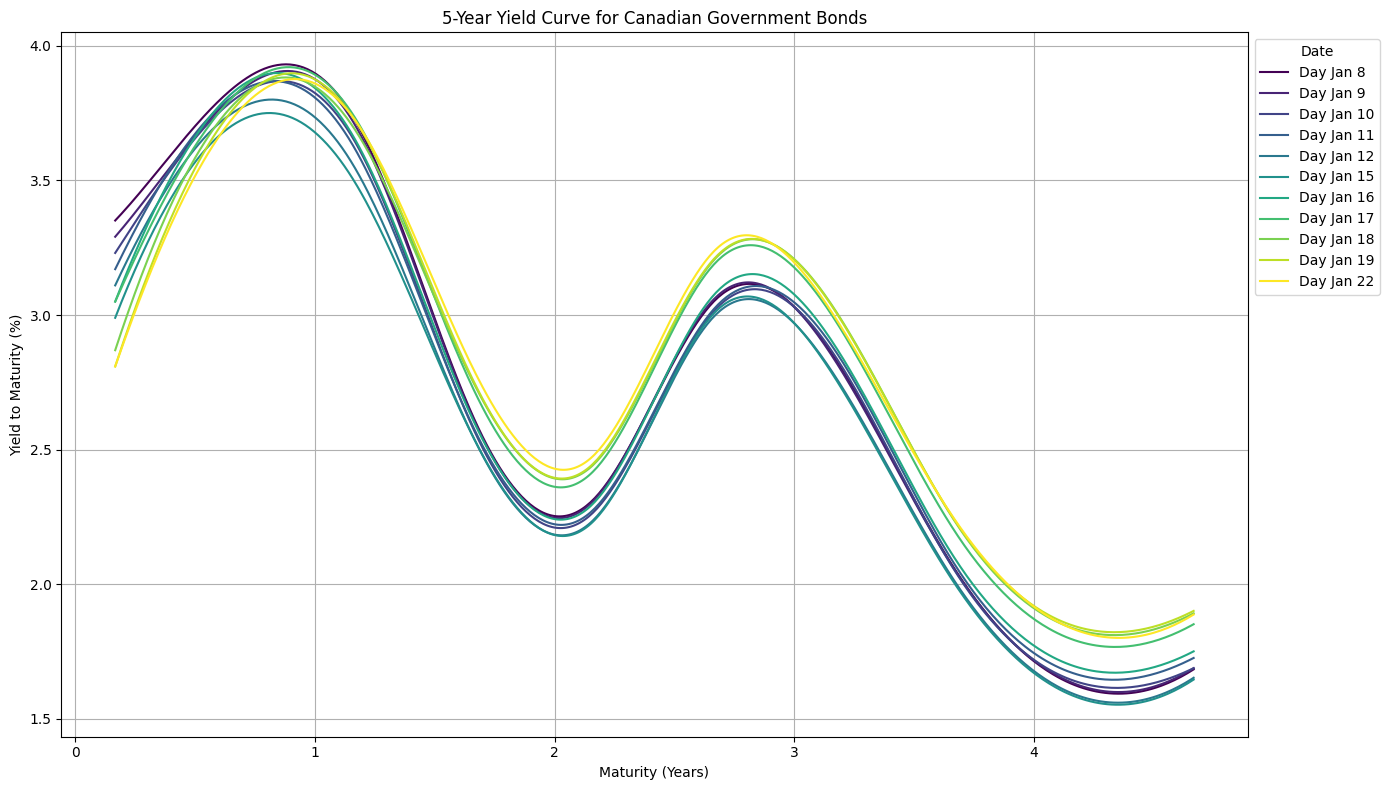

In [7]:
# Function to calculate YTM
def ytm(price, coupon, years_to_maturity, face_value=100, guess=0.05):
    def price_func(ytm):
        return sum([coupon / (1 + ytm / 2) ** (2 * t) for t in range(1, int(years_to_maturity * 2) + 1)]) + face_value / (1 + ytm / 2) ** (2 * years_to_maturity) - price
    return newton(price_func, guess)

def YTM(present_values, coupons, terms):
  # Yield to Maturity (YTM) = [Annual Coupon + (FV – PV) ÷ Number of Compounding Periods)] ÷ [(FV + PV) ÷ 2]
  # Face value is always 100
  n_periods = terms
  annual_coupons = coupons * 0.5 # semi annual coupons
  ytm = (annual_coupons + (100-present_values)/n_periods) / (1/2 * (present_values+100))
  return ytm

# Calculate YTM for each bond for each day
ytms = np.array([[YTM(price, coupon, term) for price, coupon, term in zip(day_prices, coupons, terms)] for day_prices in bond_prices])

# Plotting
plt.figure(figsize=(14, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(bond_prices)))
for i, (ytm_day, color) in enumerate(zip(ytms, colors)):
    cs = CubicSpline(terms, ytm_day)
    xs = np.linspace(terms[0], terms[-1], 500)
    ys = cs(xs)
    plt.plot(xs, ys * 100, label=f"Day {days[i]}", color=color)  # Convert YTM to percentage

plt.title("5-Year Yield Curve for Canadian Government Bonds")
plt.xlabel("Maturity (Years)")
plt.ylabel("Yield to Maturity (%)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Date")
plt.grid(True)
plt.tight_layout()
plt.show()

Justification: Treasury reserves the option to make changes to the yield curve as appropriate and in its sole discretion.  Such changes may include but are not necessarily limited to adding, removing, or modifying inputs, and making changes to the methodology for deriving the yield curve.  For example, prior to the re-introduction of the 20-year Treasury bond on May 20, 2020, when the yield curve was derived using a quasi-cubic hermite spline method, the yield curve had used additional inputs that were composites of off-the-run bonds in the 20-year range that reflected market yields available in that maturity range.  Also, at various times in the past, Treasury has used other inputs, such as interpolated yields and rolled down securities deemed necessary for deriving a good fit for the quasi-cubic hermite spline method.

https://home.treasury.gov/policy-issues/financing-the-government/interest-rate-statistics/treasury-yield-curve-methodology

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# we use this package for solving our yield curve equation simpler
from sympy import Eq, solve, exp
from sympy.abc import r

In [5]:
bond_prices = np.array([
              [99.63,99.64,99.65,99.66,99.67,99.69,99.68,99.68,99.71,99.72,99.72],
              [97.96,97.98,97.99,97.98,98.02,98.05,97.97,97.98,98,98.01,98.03],
              [96.46,96.48,96.55,96.58,96.66,96.72,96.54,96.45,96.5,96.46,96.46],
              [98.19,98.20,98.26,98.25,98.31,98.31,98.21,98.02,97.98,97.97,97.9],
              [98.27,98.28,98.37,98.35,98.43,98.44,98.3,98.05,98,97.99,97.93],
              [93.46,93.44,93.55,93.53,93.6,93.57,93.4,93.12,93.08,93.07,93],
              [93.28,93.30,93.25,93.19,93.47,93.49,93.14,92.86,92.75,92.76,92.83],
              [97.58,97.59,97.6,97.52,97.74,97.77,97.44,97.09,96.96,96.95,96.94],
              [100.5,100.48,100.44,100.33,100.64,100.67,100.22,99.83,99.66,99.62,99.67],
              [99.74,99.72,99.72,99.55,99.88,99.91,99.44,98.99,98.81,98.77,98.83],
              ]).transpose()  # each row is a day's price
terms = [1/6 + i*0.5 for i in range(10)]  # we simplify the term by assuming today is Jan 1st
days = ["Jan 8", "Jan 9", "Jan 10", "Jan 11", "Jan 12", "Jan 15", "Jan 16", "Jan 17", "Jan 18", "Jan 19", "Jan 22"]
coupons = np.array([0.0225,0.015,0.0125,0.03,0.03,0.01,0.0125,0.0275,0.0350,0.0325])

In [6]:
def get_spot_rate(dirty_prices, terms, coupons, DEBUG=False):
    # always assume only the first term is zero coupon bond
    rates = []
    for i, t in enumerate(terms):
      dp = dirty_prices[i]
      coup = coupons[i]
      coupon_payment = coup*100*0.5
      if i > 0:
        constant = sum(coupon_payment*exp(-past_r*past_t) for (past_r,past_t) in zip(rates, terms[:i]))
      else:
        constant = 0
      eqn = Eq(dp, constant + (100+coupon_payment)*exp(-r*t))
      solution = solve(eqn, r, dict=True)[0][r]
      rates.append(solution)
      if DEBUG:
        print(f"solving {dp} = {constant} + (100+{coupon_payment})*exp(-r*{t})")
        print(f"got solution = {solution}")
    return rates

In [7]:
# DEBUG with the class example
get_spot_rate(dirty_prices=[101.5,103.88], terms=[0.25, 0.75], coupons=[0.04,0.06], DEBUG=True)

solving 101.5 = 0 + (100+2.0)*exp(-r*0.25)
got solution = 0.0196560592097162
solving 103.88 = 2.98529411764706 + (100+3.0)*exp(-r*0.75)
got solution = 0.0275353749366456


[0.0196560592097162, 0.0275353749366456]

In [8]:
all_rates = []
for i, day_price in enumerate(bond_prices):
    # we always assume today is Jan 1st, which is 122 days from Sep 1st.
    dirty_prices = day_price + 122/365 * coupons * 100
    rates = get_spot_rate(dirty_prices, terms, coupons)
    all_rates.append(rates)
    print(f"Log {days[i]}:")
    print(f"day price of 10 bonds: {day_price}")
    print(f"dirty price of 10 bonds: {dirty_prices}")
    print(f"spot rates for 10 terms: {rates}")
    print("#"*30)

Log Jan 8:
day price of 10 bonds: [ 99.63  97.96  96.46  98.19  98.27  93.46  93.28  97.58 100.5   99.74]
dirty price of 10 bonds: [100.38205479  98.46136986  96.87780822  99.19273973  99.27273973
  93.79424658  93.69780822  98.49917808 101.66986301 100.82630137]
spot rates for 10 terms: [0.0442435272166302, 0.0458518249180260, 0.0434505672673410, 0.0408276930059848, 0.0378825240815635, 0.0355511542511747, 0.0347168969858322, 0.0341005596667230, 0.0331557610157522, 0.0325724808145456]
##############################
Log Jan 9:
day price of 10 bonds: [ 99.64  97.98  96.48  98.2   98.28  93.44  93.3   97.59 100.48  99.72]
dirty price of 10 bonds: [100.39205479  98.48136986  96.89780822  99.20273973  99.28273973
  93.77424658  93.71780822  98.50917808 101.64986301 100.80630137]
spot rates for 10 terms: [0.0436458405908753, 0.0455459851838479, 0.0432730246012990, 0.0407691048444949, 0.0378374948231350, 0.0356345953821844, 0.0346478791654972, 0.0340728758664097, 0.0332135222365609, 0.0326237

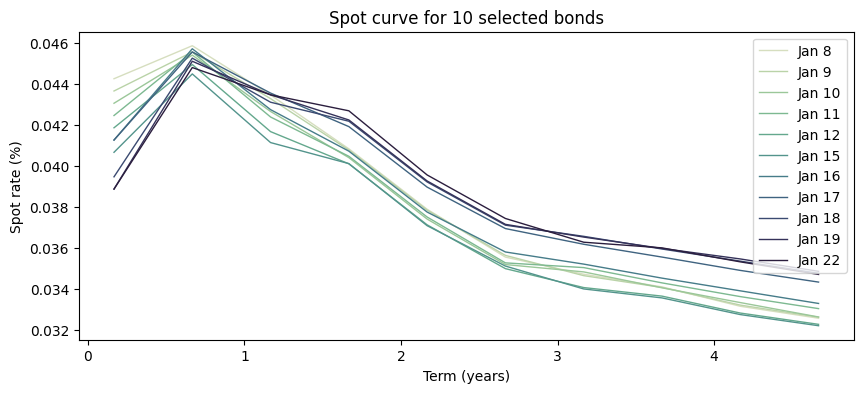

In [10]:
# plot the spot curve for each day
colors = ['#d6debf', '#bad3a8', '#9bc799', '#7db991', '#64a88d', '#53948c', '#467c89', '#3f6380', '#3b4a71', '#35325a', '#2b1e3e']
# plt.style.use('seaborn')
plt.figure(figsize=(10,4), dpi=100)
for i, rates in enumerate(all_rates):
    plt.plot(terms, rates, label=f"{days[i]}", linewidth=1, color=colors[i])
plt.xlabel("Term (years)")
plt.ylabel("Spot rate (%)")
plt.title("Spot curve for 10 selected bonds")
plt.legend()
plt.show()


# Forward Rate

In [11]:
def get_forward_rate(spot_rate, terms, base_index, forward_indices):
    # base index is the term you calculate forward rate on
    # forward indices are the term you will calculate the forward rate
    r_b = spot_rate[base_index]
    t_b = terms[base_index]
    forward_rates = []
    for i in forward_indices:
      r_a = spot_rate[i]
      t_a = terms[i]
      # f_r = (1+r_a)**t_a/(1+r_b)**t_b - 1
      # print(r_b, t_b, r_a, t_a)
      f_r = (r_a*(t_a-0)-r_b*(t_b-0)) / (t_a-t_b)
      forward_rates.append(f_r)
    return forward_rates

In [12]:
forward_rates = []
base_index = 0 # 2 corresponds to 1/6 which is approximately 1st year
forward_indices = [2,4,6,8]
for i, spot_rate in enumerate(all_rates):
  forward_rate = get_forward_rate(spot_rate, terms, base_index, forward_indices)
  forward_rates.append(forward_rate)
  print(f"forward rate for {days[i]}: {forward_rate}")

forward rate for Jan 8: [0.0433184072757928, 0.0373524404869746, 0.0341876397507879, 0.0326937707573823]
forward rate for Jan 9: [0.0432108886030363, 0.0373534660091567, 0.0341479924196429, 0.0327788423051311]
forward rate for Jan 10: [0.0425803753979857, 0.0369340493248157, 0.0343739848505899, 0.0329312537802360]
forward rate for Jan 11: [0.0423666661860695, 0.0370922530477904, 0.0346287180383610, 0.0332590824647858]
forward rate for Jan 12: [0.0416345016231931, 0.0367296674526957, 0.0336347550257634, 0.0324494757947139]
forward rate for Jan 15: [0.0412110824899595, 0.0367844304467610, 0.0336293024564326, 0.0324212909867400]
forward rate for Jan 16: [0.0429842098333494, 0.0374535211933057, 0.0348745286580433, 0.0336017026204387]
forward rate for Jan 17: [0.0439254364966329, 0.0387704345414615, 0.0358948831496663, 0.0346387386141888]
forward rate for Jan 18: [0.0437046681771457, 0.0391924900258066, 0.0364025606002183, 0.0351836152015476]
forward rate for Jan 19: [0.0442235950129517, 0.

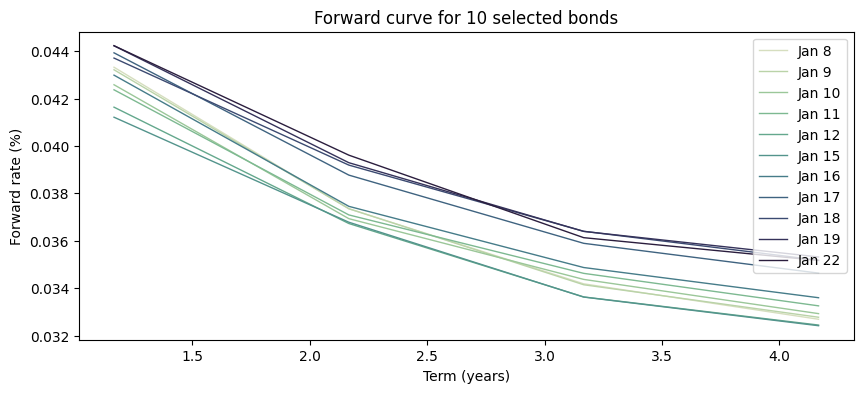

In [14]:
# plot the spot curve for each day
colors = ['#d6debf', '#bad3a8', '#9bc799', '#7db991', '#64a88d', '#53948c', '#467c89', '#3f6380', '#3b4a71', '#35325a', '#2b1e3e']
#plt.style.use('seaborn')
plt.figure(figsize=(10,4), dpi=100)
for i, rates in enumerate(forward_rates):
    plt.plot([terms[k] for k in forward_indices], rates, label=f"{days[i]}", linewidth=1, color=colors[i])
plt.xlabel("Term (years)")
plt.ylabel("Forward rate (%)")
plt.title("Forward curve for 10 selected bonds")
plt.legend()
plt.show()

# Covariance Matrices

In [15]:
import math
ytms = [list(ytm) for ytm in ytms]
print(ytms)
print(forward_rates)

[[0.022365298711752288, 0.053566910703908815, 0.05238181223555147, 0.06268036502449055, 0.06038927918602605, 0.04391164159366436, 0.04504361501134818, 0.05490125707262326, 0.05833479370983431, 0.05590647445337679], [0.021756458184366136, 0.0532547836538721, 0.05220065840568519, 0.06261823183670402, 0.060341500248712654, 0.04399330704489611, 0.044974696664669675, 0.054872688422961224, 0.05838387063131035, 0.05595071944816393], [0.021147862024036443, 0.053098761891638105, 0.05156704319880553, 0.06224560760934966, 0.05991176451302996, 0.043544406439758425, 0.045147025155992504, 0.05484412323481532, 0.05848205919574188, 0.05595071944816393], [0.020539510108178012, 0.0532547836538721, 0.05129569514420694, 0.062307690835700744, 0.06000721863817849, 0.043625977598089595, 0.045353962994509445, 0.05507274170586823, 0.05875231675358324, 0.05632722358395706], [0.019931402314271606, 0.05263086356237964, 0.050572689978718915, 0.061935316239026206, 0.0596255483869883, 0.04334057007755846, 0.04438959

In [ ]:
def rate_to_log_return(rates):
  # first transpose the rates
  rates_np = np.array(rates).T
  log_return = []
  for rate in rates_np:
    logr0 = math.log(rate[0])
    #print(logr0, rate)
    temp = [math.log(r) - logr0 for r in rate[1:]]
    log_return.append(temp)

  return log_return

def compute_covariance(log_return):
  log_return = np.array(log_return)
  return np.cov(log_return)

In [ ]:
ytms_log_return = rate_to_log_return(ytms)
forward_rates_log_return = rate_to_log_return(forward_rates)

In [ ]:
print(len(ytms_log_return))
# ignore the half years as we want X1...X5, hence
ytms_log_return = [ytms_log_return[2*i] for i in range(len(ytms_log_return)//2)]
print(len(ytms_log_return))

In [ ]:
ytms_log_return_cov = compute_covariance(ytms_log_return)
print(ytms_log_return_cov)

forward_rates_log_return_cov = compute_covariance(forward_rates_log_return)
print(forward_rates_log_return_cov)

# Eigenvalues and Eigenvectors

In [ ]:
def top5eigen(cov_matrix):
  # Calculate eigenvalues and eigenvectors
  eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

  # Sort the eigenvalues and eigenvectors by largest eigenvalue
  idx = eigenvalues.argsort()[::-1]   # indices for sorting in descending order
  sorted_eigenvalues = eigenvalues[idx]
  sorted_eigenvectors = eigenvectors[:,idx]

  # Take the first 5 (in this case, it's all of them since we only have 5)
  first_5_eigenvalues = sorted_eigenvalues[:5]
  first_5_eigenvectors = sorted_eigenvectors[:,:5]
  eigenvalues_sum = sum(eigenvalues)

  return first_5_eigenvalues, first_5_eigenvectors, eigenvalues_sum

In [ ]:

first_5_eigenvalues, first_5_eigenvectors, eigenvalues_sum = top5eigen(ytms_log_return_cov)
print(f"Top 5 eigenvalues: {first_5_eigenvalues}")
print(f"Top 5 relative percentage {list(100*first_5_eigenvalues/eigenvalues_sum)} %")
print(f"Top 5 eigenvectors: {first_5_eigenvectors}")

In [ ]:
first_5_eigenvalues, first_5_eigenvectors, eigenvalues_sum = top5eigen(forward_rates_log_return_cov)
print(f"Top 5 eigenvalues: {first_5_eigenvalues}")
print(f"Top 5 relative percentage {list(100*first_5_eigenvalues/eigenvalues_sum)} %")
print(f"Top 5 eigenvectors: {first_5_eigenvectors}")